In [100]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [101]:
%matplotlib inline

In [102]:
#reding file
data = pd.read_csv('drug200.csv')

In [103]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [104]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [106]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [107]:
data.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [108]:
# club all numberical features together
numerical_cols=data.select_dtypes(include=np.number).columns.to_list()
numerical_cols

['Age', 'Na_to_K']

In [109]:
categorical_cols=data.select_dtypes(include=object).columns.to_list()
categorical_cols

['Sex', 'BP', 'Cholesterol', 'Drug']

Text(0.5, 1.0, 'counts of Sex')

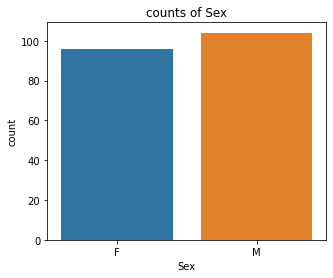

In [110]:
plt.figure(figsize=(5,4))
sns.countplot(data['Sex'])
plt.title('counts of Sex')

In [111]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [112]:
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

Text(0.5, 1.0, 'counts of BP')

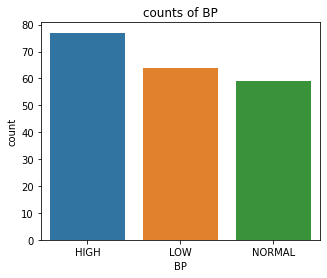

In [113]:
plt.figure(figsize=(5,4))
sns.countplot(data['BP'])
plt.title('counts of BP')

Text(0.5, 1.0, 'counts of Cholesterol')

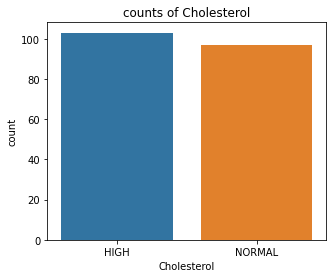

In [114]:
plt.figure(figsize=(5,4))
sns.countplot(data['Cholesterol'])
plt.title('counts of Cholesterol')

Text(0.5, 1.0, 'counts of Drug')

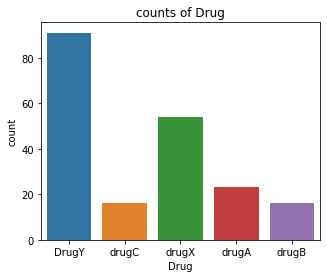

In [115]:
plt.figure(figsize=(5,4))
sns.countplot(data['Drug'])
plt.title('counts of Drug')

<AxesSubplot:xlabel='Drug', ylabel='Age'>

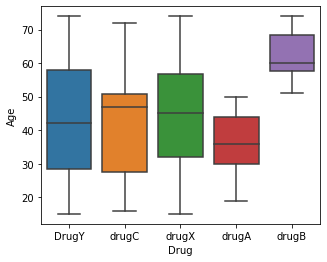

In [116]:
plt.figure(figsize=(5,4))
sns.boxplot(x=data['Drug'],y=data['Age'])

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

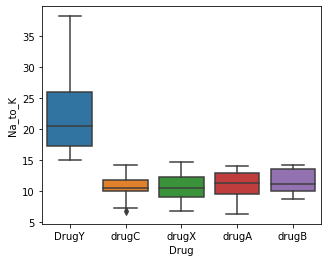

In [117]:
plt.figure(figsize=(5,4))
sns.boxplot(x=data['Drug'],y=data['Na_to_K'])

# Encoding Categorical Features

In [118]:
for col in categorical_cols:
    data[col]=data[col].astype('category').cat.codes

In [119]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [120]:
# splitting the dataframe into features and labels.
X=data.iloc[:,:-1]
y=data['Drug']

In [121]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [122]:
from sklearn.metrics import accuracy_score


# naive bayse

In [123]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

Y_pred_nb = nb.predict(x_test)

In [124]:
Y_pred_nb.shape

(40,)

In [125]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 80.0 %


# Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    data = DecisionTreeClassifier(random_state=x)
    data.fit(x_train,y_train)
    Y_pred_data = data.predict(x_test)
    current_accuracy = round(accuracy_score(Y_pred_data,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


data = DecisionTreeClassifier(random_state=best_x)
data.fit(x_train,y_train)
Y_pred_dt = data.predict(x_test)

In [127]:
print(Y_pred_data.shape)

(40,)


In [128]:
score_dt = round(accuracy_score(Y_pred_data,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 97.5 %


# Decision trees are extremely useful for data analytics,the data is not big so it analytics good